### Soical Service Events (Hayden G.)

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from fpsnippets import geo_to_neighborhood
%matplotlib inline



### Here is what the data looks like

In [2]:
data = pd.read_csv("SocialEvents 2023-01.csv", sep=",")
data1 = pd.read_csv("SocialEvents 2023-02.csv", sep=",")
data2 = pd.read_csv("SocialEvents 2023-03.csv", sep=",")
data3 = pd.read_csv("SocialEvents 2023-04.csv", sep=",")
data4 = pd.read_csv("SocialEvents 2023-05.csv", sep=",")

combined_df = pd.concat([data, data1, data2, data3, data4], ignore_index=True)

combined_df

,_id,year_month,event_name,recurrence,program_or_facility,neighborhood,address,latitude,longitude,organization,category,recommended_for,requirements,event_phone,event_narrative,schedule,holiday_exception
0,1,202301,Wellspring Recovery Group,recurring,Wellspring Drop-in Center,Uptown,"903 Watson St, PA, 15219",40.438492,-79.991555,Pittsburgh Mercy Health System,activities|health,all those recovering from addiction,"none, walk-ins welcome",412-263-2545,Wellspring's recovery group meets weekly to of...,Mon - Thurs: 11am,NaN
1,2,202301,Wellspring Open Studio,recurring,Wellspring Drop-in Center,Uptown,"903 Watson St, PA, 15219",40.438492,-79.991555,Pittsburgh Mercy Health System,activities,all,none,412-263-2545,Wellspring Drop-In Center operates an Open Stu...,Wed: 1:30pm - 3:30pm; Fri: 10am - 4pm,NaN
2,3,202301,KidsVoice Legal Q&A,recurring,412 Youth Zone,Downtown,"304 Wood St, 6th Floor, PA, 15219",40.438983,-80.001358,Auberle,finances,individuals age 24 and younger who have former...,individuals eligible to receive services at th...,412-902-4068,"At the 412 Youth Zone, KidsVoice can provide r...",Thu: 12:30pm,NaN
3,4,202301,Art Expressions,recurring,412 Youth Zone,Downtown,"304 Wood St, 6th Floor, PA, 15219",40.438983,-80.001358,Auberle,activities,all youth engaged with the 412 Youth Zone,ages 16 - 23,412-902-4068,"Art program at the Youth Zone, no prior experi...","Fri, 2/21: 2pm; Fri, 2/28: 12:30pm",NaN
4,5,202301,Cooking Workshop,recurring,412 Youth Zone,Downtown,"304 Wood St, 6th Floor, PA, 15219",40.438983,-80.001358,Auberle,expert-lookup,all youth engaged with the 412 youth zone,ages 16 - 24,412-902-4068,Learn how to shop for cooking purposes and the...,Wed 5/9: 1pm,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,56,202305,Computer Classes - Anna M. Waite Learning Center,recurring,St. Paul AME Church,Mckeesport,"1350 Locust Street, PA, 15132",40.341663,-79.860503,St. Paul AME Church,expert-lookup,Adults wanting to learn how to use a computer ...,none,412-667-1538,Help for adults and seniors to learn how to us...,Thurs: 6 - 8pm; Tuesday by appt.,NaN
296,57,202305,Healthy Parenting Program,recurring,A Child's Place,Mckees Rocks,"500 Chartiers Ave, PA, 15136",40.464983,-80.058841,Sto-Rox Neighborhood Health Council,activities,any caregiver responsible for a child ages 0-12,preferable that parents/caregivers live in Wes...,412-447-1116,free classes to help make good parents great p...,"Group or individual sessions available, class ...",NaN
297,58,202305,Bidwell Training Center,recurring,Bidwell Training Center,Northside (Chateau),"1815 Metropolitan Street, PA, 15233",40.457321,-80.032403,Manchester Bidwell Corporation,expert-lookup,NaN,For PA residents with High School diploma or GED,412-323-4000 ext 150,No cost training programs and help finding a j...,Mondays and Wednesdays: 9am,NaN
298,59,202305,Community Kitchen Pgh - Job Training,recurring,Community Kitchen Pgh,Hazelwood,"107 Flowers Ave, PA, 15207",40.410092,-79.943600,Community Kitchen Pgh,expert-lookup,anyone seeking training for employment,"Stop by an open house, every 3rd Wednesday, 10am",412-246-4736,Free training and support to help people enter...,Open House; every 3rd Wednesday; 10am,NaN


### The data with Event Names, Neighborhoods, and Locations

In [3]:
list = ["year_month", "recurrence", "program_or_facility", "address", "organization", "recommended_for", "requirements", "event_phone", "event_narrative", "schedule", "holiday_exception", "category"]
combined_df.drop(columns = list)

,_id,event_name,neighborhood,latitude,longitude
0,1,Wellspring Recovery Group,Uptown,40.438492,-79.991555
1,2,Wellspring Open Studio,Uptown,40.438492,-79.991555
2,3,KidsVoice Legal Q&A,Downtown,40.438983,-80.001358
3,4,Art Expressions,Downtown,40.438983,-80.001358
4,5,Cooking Workshop,Downtown,40.438983,-80.001358
...,...,...,...,...,...
295,56,Computer Classes - Anna M. Waite Learning Center,Mckeesport,40.341663,-79.860503
296,57,Healthy Parenting Program,Mckees Rocks,40.464983,-80.058841
297,58,Bidwell Training Center,Northside (Chateau),40.457321,-80.032403
298,59,Community Kitchen Pgh - Job Training,Hazelwood,40.410092,-79.943600


### Number of Services per location

In [4]:
table = {}
for index, row in combined_df.iterrows():
    name = geo_to_neighborhood(row["latitude"], row["longitude"])
    if name == None:
        continue
    table[name] = 0
    
for index, row in combined_df.iterrows():
    name = geo_to_neighborhood(row["latitude"], row["longitude"])
    if name == None:
        continue
    table[name] = table[name] + 1 or 1
total = 0    
for i in table:
    total = total + table[i]
    print(i + ": " + str(table[i]))
    print("--------")
print(total)

Bluff: 10
--------
Central Business District: 190
--------
California-Kirkbride: 5
--------
Upper Lawrenceville: 5
--------
Middle Hill: 10
--------
Strip District: 15
--------
East Allegheny: 5
--------
Larimer: 5
--------
South Side Flats: 5
--------
Point Breeze North: 5
--------
Homewood South: 5
--------
Chateau: 5
--------
Hazelwood: 5
--------
270


### Percentage of Social Events

In [8]:
for i in table:
    print(i + ": " + str(round(table[i]/total, 2)))
    print("--------")

Bluff: 0.04
--------
Central Business District: 0.7
--------
California-Kirkbride: 0.02
--------
Upper Lawrenceville: 0.02
--------
Middle Hill: 0.04
--------
Strip District: 0.06
--------
East Allegheny: 0.02
--------
Larimer: 0.02
--------
South Side Flats: 0.02
--------
Point Breeze North: 0.02
--------
Homewood South: 0.02
--------
Chateau: 0.02
--------
Hazelwood: 0.02
--------
270


### The Data Plotted

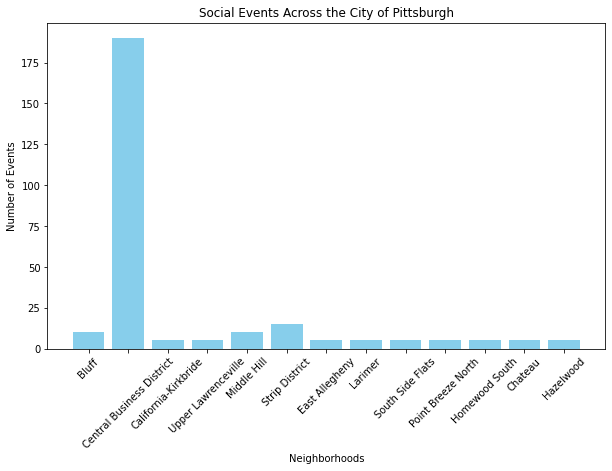

In [5]:


combined_data = {
    'Events': [],
    'Places': []
}

for i in table:
    combined_data["Events"].append(table[i])
    combined_data["Places"].append(i)


combined_df = pd.DataFrame(combined_data)

plt.figure(figsize=(10, 6))
plt.bar(combined_df['Places'], combined_df['Events'], color='skyblue')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Events')
plt.title('Social Events Across the City of Pittsburgh')
plt.xticks(rotation=45)
plt.show()

## Analysis -->

The results of the plotted graph show that the central business district has a overwhelming amount of Social Events compared to the other neighborhoods acrossed Pittsburgh. Coming in at 190 across 5 months in 2023, the central business district beats all other neighborhoods by a great majority. 